In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
species = np.unique(df.species)
X = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(df.iloc[:, :-1]))
Y = LabelEncoder().fit_transform(df.iloc[:, -1])
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.1)

In [4]:
sigma = 1

In [5]:
predicted_Y = []
for row in test_X:
    sums = []
    for s in np.unique(Y):
        selected_species = train_X[train_Y == s].copy()
        selected_species = ((row - selected_species) ** 2)
        sum_selected_species = (selected_species.sum(axis = 1) * -1) /(2 * (sigma ** 2))
        sums.append(sum_selected_species.sum())
    predicted_Y.append(np.argmax(sums))

In [6]:
from sklearn import metrics
print(metrics.classification_report(test_Y, predicted_Y, target_names = species))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         5
 versicolor       0.80      1.00      0.89         4
  virginica       1.00      0.83      0.91         6

avg / total       0.95      0.93      0.93        15



In [7]:
import matplotlib.pyplot as plt

In [8]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
rows = np.c_[xx.ravel(), yy.ravel()]

predicted_Y = []
for row in rows:
    sums = []
    for s in np.unique(Y):
        selected_species = train_X[train_Y == s].copy()
        selected_species = ((row - selected_species) ** 2)
        sum_selected_species = (selected_species.sum(axis = 1) * -1) /(2 * (sigma ** 2))
        sums.append(sum_selected_species.sum())
    predicted_Y.append(np.argmax(sums))

Z = np.array(predicted_Y)
Z = Z.reshape(xx.shape)

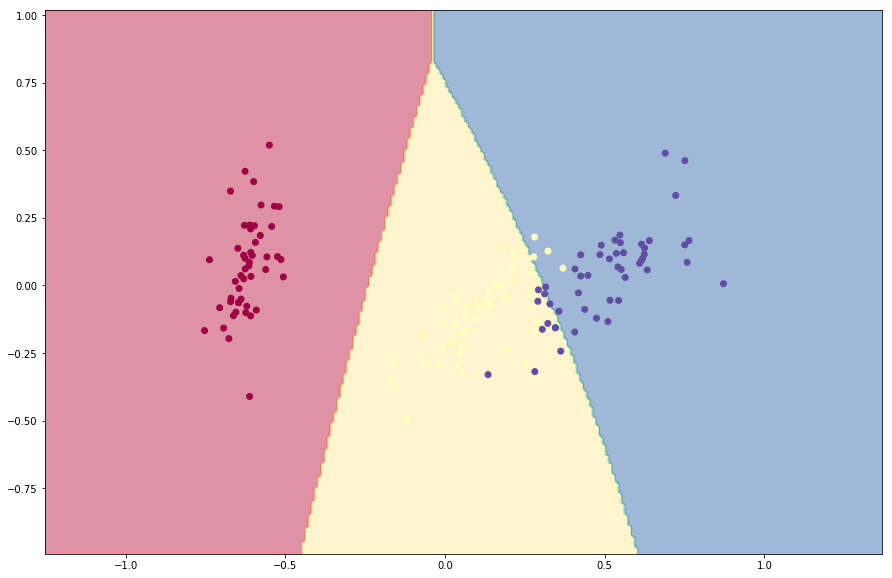

In [9]:
plt.figure(figsize=(15,10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.show()